<a href="https://colab.research.google.com/github/KyoldFusion/BreastCancerML/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
from statsmodels.multivariate.pca import PCA 
from numpy.linalg import eig
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

# Score the model with the testing dataset
model.score(X_test, y_test)

0.8360655737704918

In [ ]:
df2 = pd.DataFrame({"Predicted": y_pred, "Actual": y_test})
df2.head(10)

,Predicted,Actual
97,0,1
122,1,1
84,1,1
231,0,0
110,1,1
155,1,1
53,1,1
85,1,1
112,1,1
118,1,1


In [ ]:
print(f'Accuracy: {model.score(X_test, y_test)}')

Accuracy: 0.8360655737704918


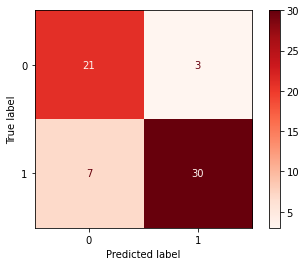

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

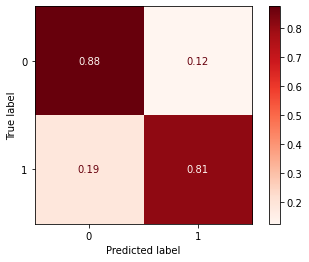

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [ ]:
X_cov = X.cov()
X_cov

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139
sex,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462


In [ ]:
values, vectors = eig(X_cov)

In [ ]:
# Print Eigenvalues & Eigenvectors
print(f"Eigenvalues:\n{values}")
print()
print(f"Eigenvectors:\n{vectors}")

Eigenvalues:
[2.69586528e+03 5.42264942e+02 3.05073066e+02 5.84779802e+01
 1.38508932e+00 1.01418660e+00 8.25795710e-01 3.60017094e-01
 1.13275430e-01 2.78450175e-01 1.47738670e-01 1.81365780e-01
 2.11828958e-01]

Eigenvectors:
[[ 3.94611190e-02  1.82186255e-01 -1.25504851e-01 -9.74045897e-01
  -9.42717280e-03 -3.57395672e-03 -2.35709774e-02 -4.13752558e-03
   3.39271415e-03 -1.17999192e-03 -3.69770418e-04  6.83160351e-03
  -2.15313686e-04]
 [-1.78278639e-03  7.93727347e-04  1.06523049e-03  4.63454359e-03
   7.83114718e-02  2.81628747e-02  4.56421467e-02 -3.05438663e-01
   9.06424879e-02  2.18543751e-01  4.36806459e-01  7.73979050e-01
  -2.27707877e-01]
 [-1.53716667e-03 -1.25419057e-02 -6.16323248e-03 -9.26243002e-03
  -3.33646266e-01 -7.00831283e-01  5.97896304e-01 -1.27720409e-01
   6.29721136e-02  2.68592119e-02 -1.32559224e-01  3.42705015e-02
   2.53547739e-03]
 [ 4.75880705e-02  1.03810033e-01 -9.82278058e-01  1.48034489e-01
  -9.78973319e-03  7.57948749e-03 -1.79648282e-03  2.21

In [ ]:
# Confirm single value for first Eigenvector & Eigenvalue Product
# First Eigenvector = vectors[:,0]
# First Eigenvalue = values[0]
X_values = X_cov.values[0]
print(f"First Eigenvector: {vectors[:,0]} ")
print(f"First Eigenvalue: {values[0]} ")
print(f"Cov Matrix & Eigenvector Product: {(vectors[:,0][0]*X_values[0])+(vectors[:,0][1]*X_values[1])+(vectors[:,0][2]*X_values[2])+(vectors[:,0][3]*X_values[3])}")
print(f"Eigenvecotr & Eigenvalue Product: {vectors[:,0][0]*values[0]}")

First Eigenvector: [ 3.94611190e-02 -1.78278639e-03 -1.53716667e-03  4.75880705e-02
  9.98053283e-01  1.16389852e-04 -1.55243101e-03 -7.35838010e-03
  6.31483108e-04  1.32988432e-03 -9.99857233e-05  1.46773705e-03
  1.18215354e-03] 
First Eigenvalue: 2695.8652765881125 
Cov Matrix & Eigenvector Product: 5.374139072160219
Eigenvecotr & Eigenvalue Product: 106.3818603904336


In [ ]:
# Confirm all values for first Eigenvector & Eigenvalue with Dot Product Multiplication 
print(X_cov.dot(vectors[:,0]))
print(vectors[:,0].dot(values[0]))

age          106.381860
sex           -4.806152
cp            -4.143994
trestbps     128.291027
chol        2690.617190
fbs            0.313771
restecg       -4.185145
thalach      -19.837201
exang          1.702393
oldpeak        3.585189
slope         -0.269548
ca             3.956821
thal           3.186927
dtype: float64
[ 1.06381860e+02 -4.80615191e+00 -4.14399424e+00  1.28291027e+02
  2.69061719e+03  3.13771362e-01 -4.18514484e+00 -1.98372014e+01
  1.70239338e+00  3.58518897e+00 -2.69548040e-01  3.95682134e+00
  3.18692668e+00]


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
pca = PCA(X, standardize=True, method='eig')
components_df = pca.factors

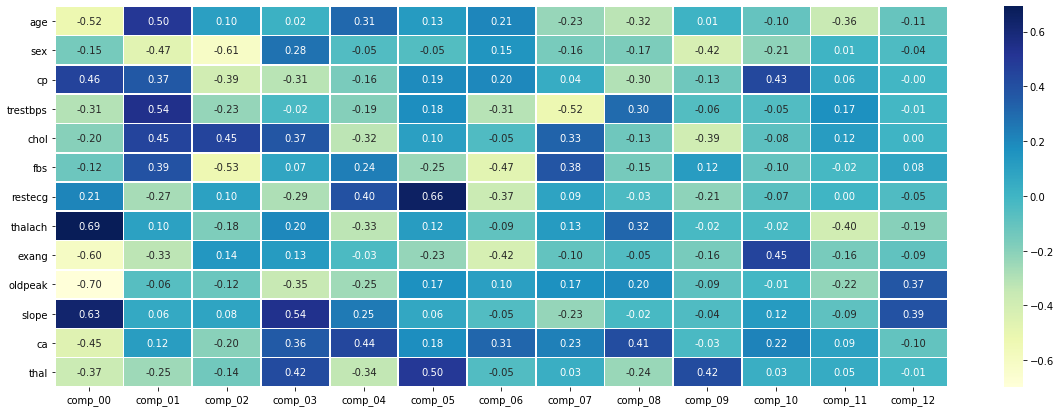

In [ ]:
# Combine the X varaibles and new principal compenents
combined_df = pd.concat([X, components_df], axis=1)

# Create a correlation matrix of all X variables and principal components
correlation = combined_df.corr()

# Creat a matrix showing the correlation between:
# Features vs Principal Components
# Remove the parts of the output to keep the correlation between features and principal components
# Keep Rows up till components: correlation[:-len(components_df.columns)]
# Keep Columns starting with compenents: .loc[:, 'comp_00':]
correlation_plot_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

# Plot Features vs Principal Components correlation matrix
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation_plot_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [ ]:
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])
print(eigen_values)

    eigenvalue
0   837.197152
1   465.617677
2   370.518793
3   357.887090
4   309.655862
5   293.914808
6   261.419288
7   235.111450
8   217.834428
9   188.335766
10  160.621744
11  128.212141
12  112.673801


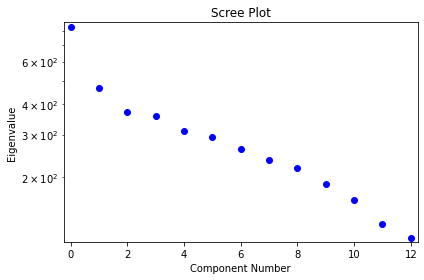

In [ ]:
pca.plot_scree()
plt.show()

In [ ]:
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])
print(cumulative_variance_explained)

    cumulative_var
0         0.000000
1         0.212541
2         0.330748
3         0.424812
4         0.515669
5         0.594282
6         0.668899
7         0.735265
8         0.794954
9         0.850256
10        0.898069
11        0.938846
12        0.971395
13        1.000000


In [ ]:
cumulative_df =  components_df.iloc[:, :5]
cumulative_df

,comp_00,comp_01,comp_02,comp_03,comp_04
0,-0.021570,0.107575,-0.128562,-0.141466,-0.021325
1,0.015759,-0.044367,-0.059203,-0.128283,-0.129213
2,0.063205,0.001987,0.023494,-0.021483,-0.049315
3,0.059307,-0.022955,-0.001591,0.005929,0.013388
4,0.012834,0.013957,0.147597,0.042766,-0.000647
...,...,...,...,...,...
298,-0.039630,-0.024077,0.088734,-0.018176,0.010250
299,0.024490,-0.048463,-0.028303,-0.048825,-0.051141
300,-0.084986,0.022164,-0.114719,-0.013711,0.075847
301,-0.060923,-0.108295,-0.023625,-0.028376,0.067205
